In [175]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import matplotlib.colors as mp_colors

from invisible_cities.icaro.hst_functions  import hist2d

In [73]:
eventsPath    = '/data5/users/carmenromo/fastmc/validation_matrices/data_files_using_matrices/'
start         = 1000
numb_of_files = 1000

thrs = ['0.5', '1.0', '1.5']
cols = ['event_id', 'true_energy', 
        'true_r1', 'true_phi1', 'true_z1', 'true_t1', 
        'true_r2', 'true_phi2', 'true_z2', 'true_t2', 'phot_like1', 'phot_like2',
        'reco_r1', 'reco_phi1', 'reco_z1', 'reco_t1',
        'reco_r2', 'reco_phi2', 'reco_z2', 'reco_t2']

ev_below_e_thr_0 = pd.DataFrame(columns=cols)
ev_above_e_thr_0 = pd.DataFrame(columns=cols)
ev_below_e_thr_1 = pd.DataFrame(columns=cols)
ev_above_e_thr_1 = pd.DataFrame(columns=cols)
ev_below_e_thr_2 = pd.DataFrame(columns=cols)
ev_above_e_thr_2 = pd.DataFrame(columns=cols)

for file_number in range(start, start+numb_of_files):
    try:
        for th in thrs:
            filename  = f'full_body_phantom_reco_thr{th}pes.{file_number}.h5'
            file_name = eventsPath+filename
            table = pd.read_hdf(file_name, 'reco/table')
            sel_below_th = (table.true_energy > 0.) & (table.true_r1 == 0.)
            reco0 = table[ sel_below_th]
            reco1 = table[~sel_below_th]
            if th == '0.5':
                ev_below_e_thr_0 = pd.concat([ev_below_e_thr_0, reco0], ignore_index=True)
                ev_above_e_thr_0 = pd.concat([ev_above_e_thr_0, reco1], ignore_index=True)
            elif th == '1.0':
                ev_below_e_thr_1 = pd.concat([ev_below_e_thr_1, reco0], ignore_index=True)
                ev_above_e_thr_1 = pd.concat([ev_above_e_thr_1, reco1], ignore_index=True)
            else:
                ev_below_e_thr_2 = pd.concat([ev_below_e_thr_2, reco0], ignore_index=True)
                ev_above_e_thr_2 = pd.concat([ev_above_e_thr_2, reco1], ignore_index=True)
                
    except FileNotFoundError:
        continue

In [74]:
ev_above_e_thr_0['reco_x1'] = ev_above_e_thr_0.reco_r1.values*np.cos(ev_above_e_thr_0.reco_phi1.values)
ev_above_e_thr_0['reco_y1'] = ev_above_e_thr_0.reco_r1.values*np.sin(ev_above_e_thr_0.reco_phi1.values)
ev_above_e_thr_0['reco_x2'] = ev_above_e_thr_0.reco_r2.values*np.cos(ev_above_e_thr_0.reco_phi2.values)
ev_above_e_thr_0['reco_y2'] = ev_above_e_thr_0.reco_r2.values*np.sin(ev_above_e_thr_0.reco_phi2.values)
ev_above_e_thr_0['true_x1'] = ev_above_e_thr_0.true_r1.values*np.cos(ev_above_e_thr_0.true_phi1.values)
ev_above_e_thr_0['true_y1'] = ev_above_e_thr_0.true_r1.values*np.sin(ev_above_e_thr_0.true_phi1.values)
ev_above_e_thr_0['true_x2'] = ev_above_e_thr_0.true_r2.values*np.cos(ev_above_e_thr_0.true_phi2.values)
ev_above_e_thr_0['true_y2'] = ev_above_e_thr_0.true_r2.values*np.sin(ev_above_e_thr_0.true_phi2.values)

ev_above_e_thr_1['reco_x1'] = ev_above_e_thr_1.reco_r1.values*np.cos(ev_above_e_thr_1.reco_phi1.values)
ev_above_e_thr_1['reco_y1'] = ev_above_e_thr_1.reco_r1.values*np.sin(ev_above_e_thr_1.reco_phi1.values)
ev_above_e_thr_1['reco_x2'] = ev_above_e_thr_1.reco_r2.values*np.cos(ev_above_e_thr_1.reco_phi2.values)
ev_above_e_thr_1['reco_y2'] = ev_above_e_thr_1.reco_r2.values*np.sin(ev_above_e_thr_1.reco_phi2.values)
ev_above_e_thr_1['true_x1'] = ev_above_e_thr_1.true_r1.values*np.cos(ev_above_e_thr_1.true_phi1.values)
ev_above_e_thr_1['true_y1'] = ev_above_e_thr_1.true_r1.values*np.sin(ev_above_e_thr_1.true_phi1.values)
ev_above_e_thr_1['true_x2'] = ev_above_e_thr_1.true_r2.values*np.cos(ev_above_e_thr_1.true_phi2.values)
ev_above_e_thr_1['true_y2'] = ev_above_e_thr_1.true_r2.values*np.sin(ev_above_e_thr_1.true_phi2.values)

ev_above_e_thr_2['reco_x1'] = ev_above_e_thr_2.reco_r1.values*np.cos(ev_above_e_thr_2.reco_phi1.values)
ev_above_e_thr_2['reco_y1'] = ev_above_e_thr_2.reco_r1.values*np.sin(ev_above_e_thr_2.reco_phi1.values)
ev_above_e_thr_2['reco_x2'] = ev_above_e_thr_2.reco_r2.values*np.cos(ev_above_e_thr_2.reco_phi2.values)
ev_above_e_thr_2['reco_y2'] = ev_above_e_thr_2.reco_r2.values*np.sin(ev_above_e_thr_2.reco_phi2.values)
ev_above_e_thr_2['true_x1'] = ev_above_e_thr_2.true_r1.values*np.cos(ev_above_e_thr_2.true_phi1.values)
ev_above_e_thr_2['true_y1'] = ev_above_e_thr_2.true_r1.values*np.sin(ev_above_e_thr_2.true_phi1.values)
ev_above_e_thr_2['true_x2'] = ev_above_e_thr_2.true_r2.values*np.cos(ev_above_e_thr_2.true_phi2.values)
ev_above_e_thr_2['true_y2'] = ev_above_e_thr_2.true_r2.values*np.sin(ev_above_e_thr_2.true_phi2.values)

In [75]:
ev_above_e_thr_2.head()

,event_id,index,phot_like1,phot_like2,reco_phi1,reco_phi2,reco_r1,reco_r2,reco_t1,reco_t2,...,true_z1,true_z2,reco_x1,reco_y1,reco_x2,reco_y2,true_x1,true_y1,true_x2,true_y2
0,30000010.0,0.0,0.0,0.0,-2.295023,0.800433,380.420167,395.258853,1655.773356,1803.692565,...,204.739853,-78.465645,-252.049905,-284.939201,275.256564,283.660686,-260.732354,-286.246904,269.301854,283.419491
1,30000011.0,0.0,1.0,0.0,2.491258,-0.568285,386.882440,386.636510,1224.821327,2014.841158,...,103.040283,-216.999146,-307.912556,234.238938,325.867033,-208.082838,-307.171495,234.350756,323.503775,-211.525825
2,30000021.0,0.0,1.0,0.0,-2.396613,0.589120,381.465879,390.829887,1896.794633,1822.317896,...,-280.982269,211.893494,-280.416192,-258.617432,324.947684,217.156632,-281.603342,-258.215019,327.307677,215.907222
3,30000023.0,0.0,0.0,0.0,-1.194359,1.983062,382.129700,381.080694,1656.636404,2010.414194,...,64.822388,-136.211136,140.474655,-355.373013,-152.693648,349.152038,136.356645,-366.748246,-153.870042,351.397209
4,30000036.0,0.0,0.0,0.0,0.317466,-2.534560,394.353693,394.760736,2076.266669,1946.164589,...,-198.688644,160.214569,374.647621,123.101563,-324.234474,-225.184468,375.297545,125.769083,-317.454128,-215.482315


In [86]:
true_x_0   = np.concatenate((ev_above_e_thr_0.true_x1.values,   ev_above_e_thr_0.true_x2.values))
true_x_1   = np.concatenate((ev_above_e_thr_1.true_x1.values,   ev_above_e_thr_1.true_x2.values))
true_x_2   = np.concatenate((ev_above_e_thr_2.true_x1.values,   ev_above_e_thr_2.true_x2.values))
true_y_0   = np.concatenate((ev_above_e_thr_0.true_y1.values,   ev_above_e_thr_0.true_y2.values))
true_y_1   = np.concatenate((ev_above_e_thr_1.true_y1.values,   ev_above_e_thr_1.true_y2.values))
true_y_2   = np.concatenate((ev_above_e_thr_2.true_y1.values,   ev_above_e_thr_2.true_y2.values))
true_r_0   = np.concatenate((ev_above_e_thr_0.true_r1.values,   ev_above_e_thr_0.true_r2.values))
true_r_1   = np.concatenate((ev_above_e_thr_1.true_r1.values,   ev_above_e_thr_1.true_r2.values))
true_r_2   = np.concatenate((ev_above_e_thr_2.true_r1.values,   ev_above_e_thr_2.true_r2.values))
true_phi_0 = np.concatenate((ev_above_e_thr_0.true_phi1.values, ev_above_e_thr_0.true_phi2.values))
true_phi_1 = np.concatenate((ev_above_e_thr_1.true_phi1.values, ev_above_e_thr_1.true_phi2.values))
true_phi_2 = np.concatenate((ev_above_e_thr_2.true_phi1.values, ev_above_e_thr_2.true_phi2.values))
true_z_0   = np.concatenate((ev_above_e_thr_0.true_z1.values,   ev_above_e_thr_0.true_z2.values))
true_z_1   = np.concatenate((ev_above_e_thr_1.true_z1.values,   ev_above_e_thr_1.true_z2.values))
true_z_2   = np.concatenate((ev_above_e_thr_2.true_z1.values,   ev_above_e_thr_2.true_z2.values))
true_t_0   = np.concatenate((ev_above_e_thr_0.true_t1.values,   ev_above_e_thr_0.true_t2.values))
true_t_1   = np.concatenate((ev_above_e_thr_1.true_t1.values,   ev_above_e_thr_1.true_t2.values))
true_t_2   = np.concatenate((ev_above_e_thr_2.true_t1.values,   ev_above_e_thr_2.true_t2.values))


reco_x_0   = np.concatenate((ev_above_e_thr_0.reco_x1.values,   ev_above_e_thr_0.reco_x2.values))
reco_x_1   = np.concatenate((ev_above_e_thr_1.reco_x1.values,   ev_above_e_thr_1.reco_x2.values))
reco_x_2   = np.concatenate((ev_above_e_thr_2.reco_x1.values,   ev_above_e_thr_2.reco_x2.values))
reco_y_0   = np.concatenate((ev_above_e_thr_0.reco_y1.values,   ev_above_e_thr_0.reco_y2.values))
reco_y_1   = np.concatenate((ev_above_e_thr_1.reco_y1.values,   ev_above_e_thr_1.reco_y2.values))
reco_y_2   = np.concatenate((ev_above_e_thr_2.reco_y1.values,   ev_above_e_thr_2.reco_y2.values))
reco_r_0   = np.concatenate((ev_above_e_thr_0.reco_r1.values,   ev_above_e_thr_0.reco_r2.values))
reco_r_1   = np.concatenate((ev_above_e_thr_1.reco_r1.values,   ev_above_e_thr_1.reco_r2.values))
reco_r_2   = np.concatenate((ev_above_e_thr_2.reco_r1.values,   ev_above_e_thr_2.reco_r2.values))
reco_phi_0 = np.concatenate((ev_above_e_thr_0.reco_phi1.values, ev_above_e_thr_0.reco_phi2.values))
reco_phi_1 = np.concatenate((ev_above_e_thr_1.reco_phi1.values, ev_above_e_thr_1.reco_phi2.values))
reco_phi_2 = np.concatenate((ev_above_e_thr_2.reco_phi1.values, ev_above_e_thr_2.reco_phi2.values))
reco_z_0   = np.concatenate((ev_above_e_thr_0.reco_z1.values,   ev_above_e_thr_0.reco_z2.values))
reco_z_1   = np.concatenate((ev_above_e_thr_1.reco_z1.values,   ev_above_e_thr_1.reco_z2.values))
reco_z_2   = np.concatenate((ev_above_e_thr_2.reco_z1.values,   ev_above_e_thr_2.reco_z2.values))
reco_t_0   = np.concatenate((ev_above_e_thr_0.reco_t1.values,   ev_above_e_thr_0.reco_t2.values))
reco_t_1   = np.concatenate((ev_above_e_thr_1.reco_t1.values,   ev_above_e_thr_1.reco_t2.values))
reco_t_2   = np.concatenate((ev_above_e_thr_2.reco_t1.values,   ev_above_e_thr_2.reco_t2.values))

In [176]:
def plot_2d_reco_true(x_reco, y_reco, x_true, y_true, xbins, ybins,
                      label_xreco, label_yreco, label_xtrue, label_ytrue,
                      lim_xreco=(-410,410), lim_yreco=(-410,410),
                      lim_xtrue=(-410,410), lim_ytrue=(-410,410)):
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))

    h1 = ax1.hist2d(x_reco, y_reco, (xbins, ybins), cmin=1, norm=mp_colors.LogNorm())
    h2 = ax2.hist2d(x_true, y_true, (xbins, ybins), cmin=1, norm=mp_colors.LogNorm())
    
    ax1.set_xlabel(label_xreco, size=16)
    ax1.set_ylabel(label_yreco, size=16)
    ax1.set_xlim(lim_xreco)
    ax1.set_ylim(lim_yreco)
    
    ax2.set_xlabel(label_xtrue, size=16)
    ax2.set_ylabel(label_ytrue, size=16)
    ax2.set_xlim(lim_xtrue)
    ax2.set_ylim(lim_ytrue)
    
    cbar1 = plt.colorbar(h1[3], ax=ax1)
    cbar1.set_label('Number of events')
    cbar2 = plt.colorbar(h2[3], ax=ax2)
    cbar2.set_label('Number of events')
    
    plt.tight_layout()

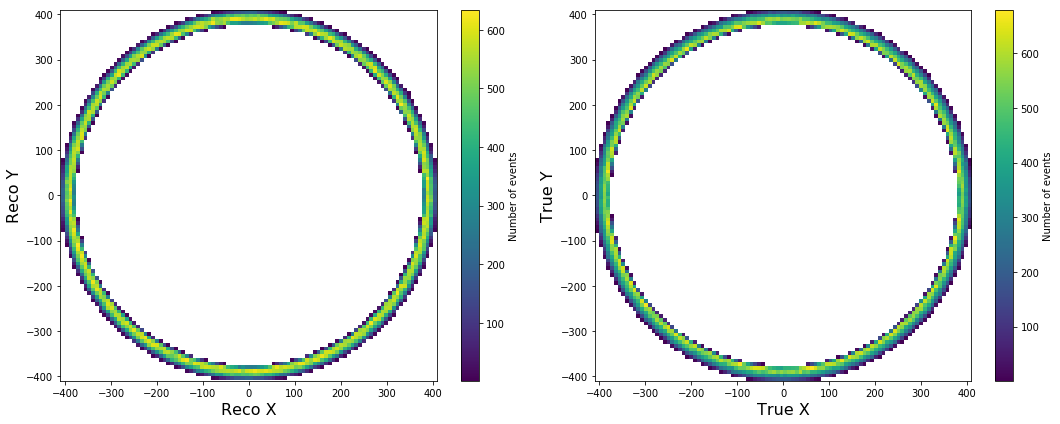

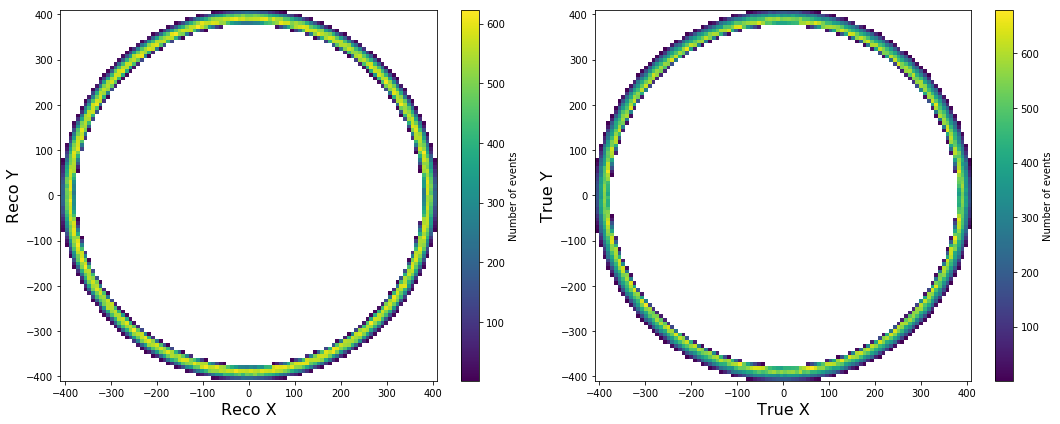

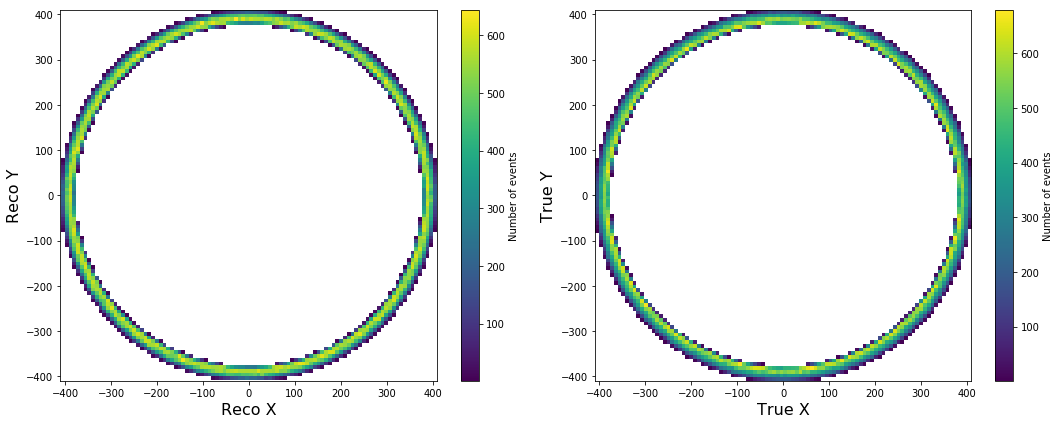

In [106]:
plot_2d_reco_true(reco_x_0, reco_y_0, true_x_0, true_y_0, xbins, ybins,
                 'Reco X', 'Reco Y', 'True X', 'True Y')
plot_2d_reco_true(reco_x_1, reco_y_1, true_x_1, true_y_1, xbins, ybins,
                 'Reco X', 'Reco Y', 'True X', 'True Y')
plot_2d_reco_true(reco_x_2, reco_y_2, true_x_2, true_y_2, xbins, ybins,
                 'Reco X', 'Reco Y', 'True X', 'True Y')

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


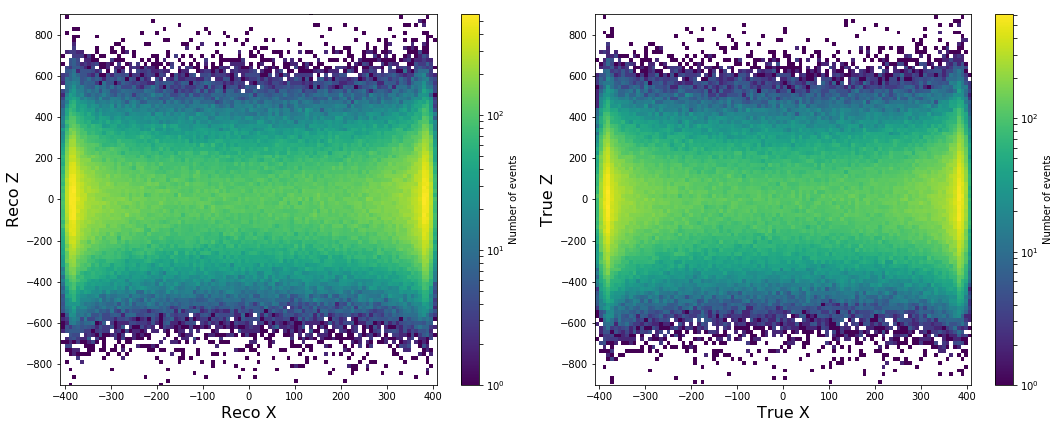

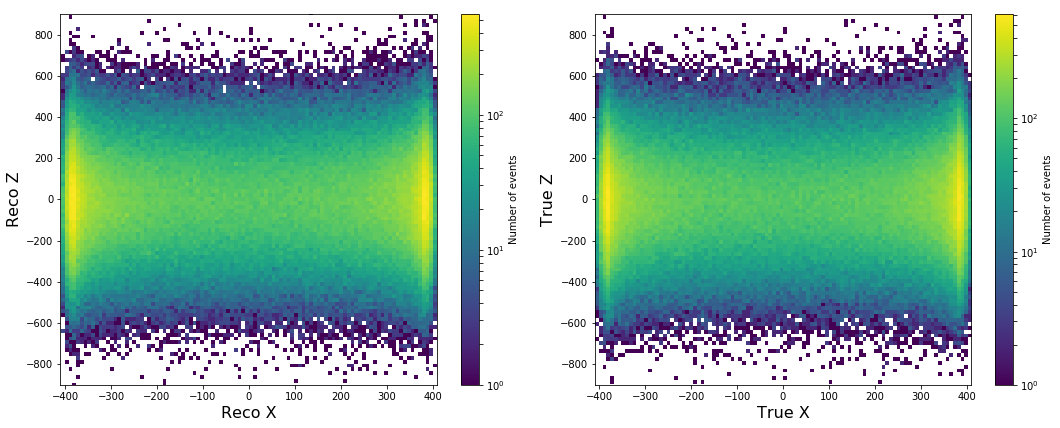

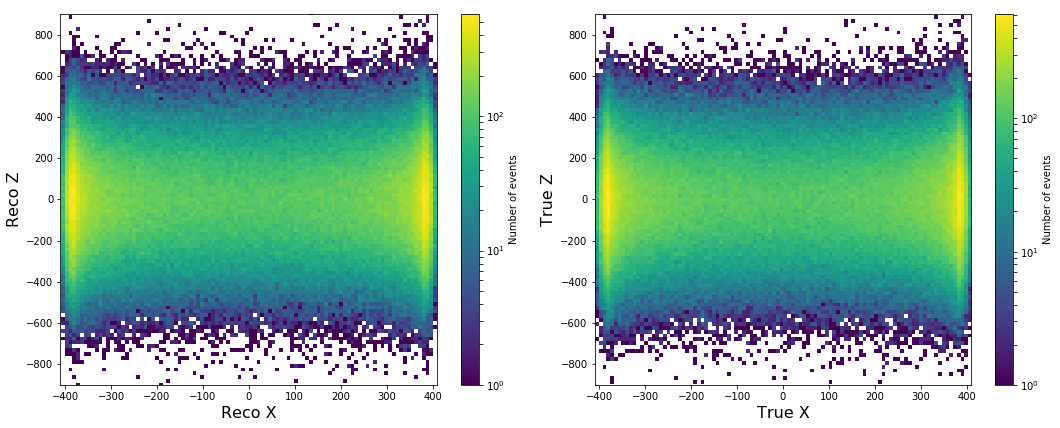

In [184]:
plot_2d_reco_true(reco_x_0, reco_z_0, true_x_0, true_z_0, xbins, ybins,
                 'Reco X', 'Reco Z', 'True X', 'True Z',
                  (-410,410), (-900, 900), (-410,410), (-900, 900))
plot_2d_reco_true(reco_x_1, reco_z_1, true_x_1, true_z_1, xbins, ybins,
                 'Reco X', 'Reco Z', 'True X', 'True Z',
                  (-410,410), (-900, 900), (-410,410), (-900, 900))
plot_2d_reco_true(reco_x_2, reco_z_2, true_x_2, true_z_2, xbins, ybins,
                 'Reco X', 'Reco Z', 'True X', 'True Z',
                  (-410,410), (-900, 900), (-410,410), (-900, 900))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


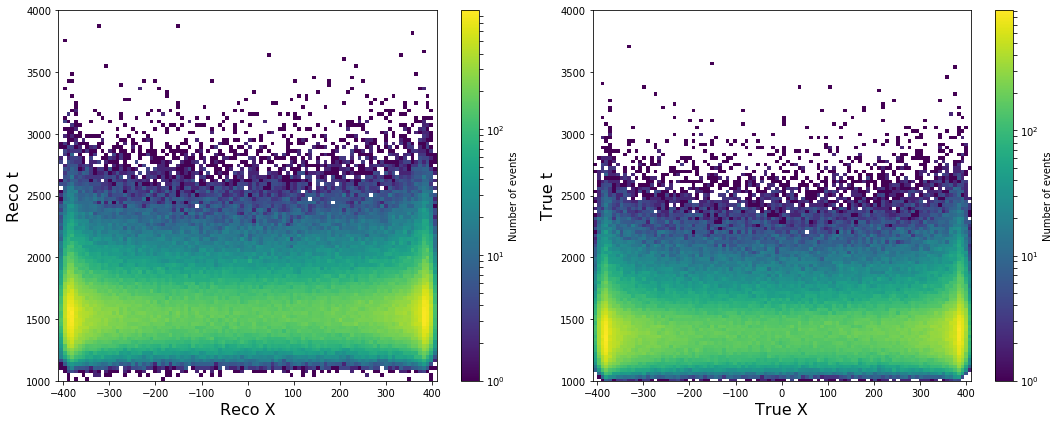

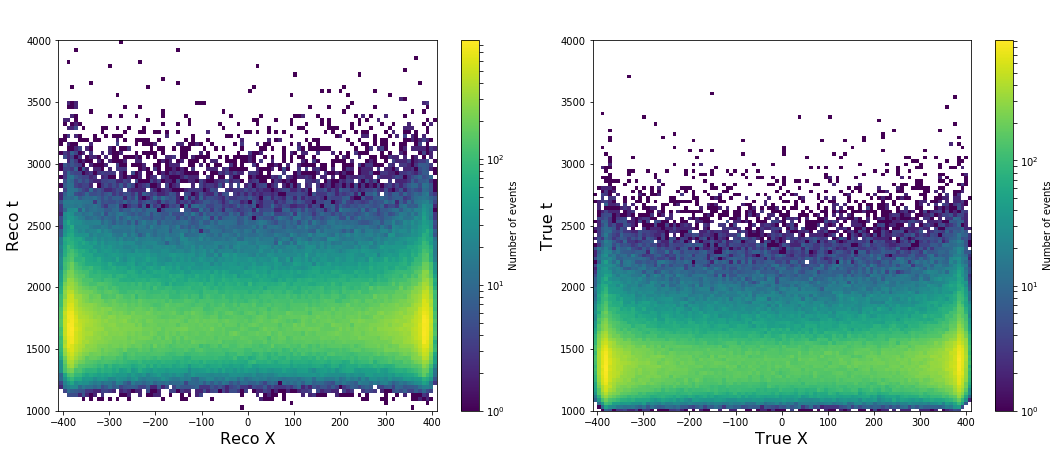

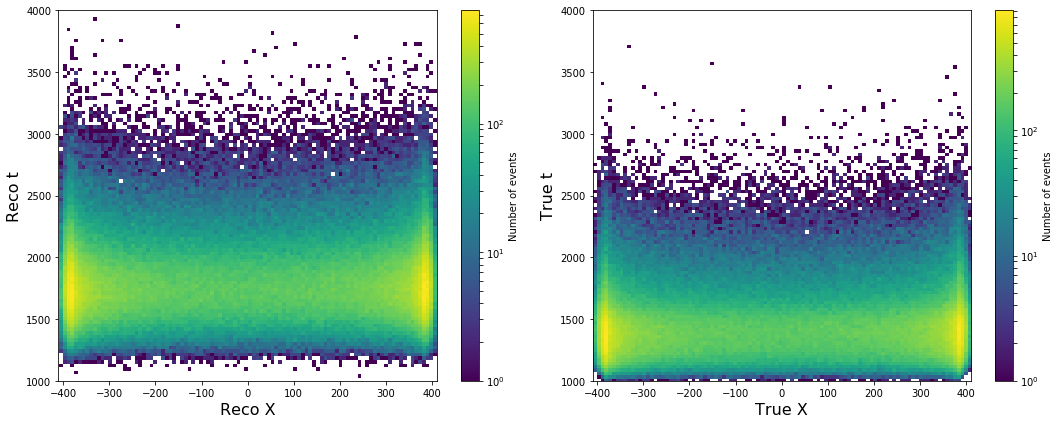

In [185]:
plot_2d_reco_true(reco_x_0, reco_t_0, true_x_0, true_t_0, xbins, ybins,
                 'Reco X', 'Reco t', 'True X', 'True t',
                 (-410,410), (1000, 4000), (-410,410), (1000, 4000))
plot_2d_reco_true(reco_x_1, reco_t_1, true_x_1, true_t_1, xbins, ybins,
                 'Reco X', 'Reco t', 'True X', 'True t',
                 (-410,410), (1000, 4000), (-410,410), (1000, 4000))
plot_2d_reco_true(reco_x_2, reco_t_2, true_x_2, true_t_2, xbins, ybins,
                 'Reco X', 'Reco t', 'True X', 'True t',
                 (-410,410), (1000, 4000), (-410,410), (1000, 4000))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


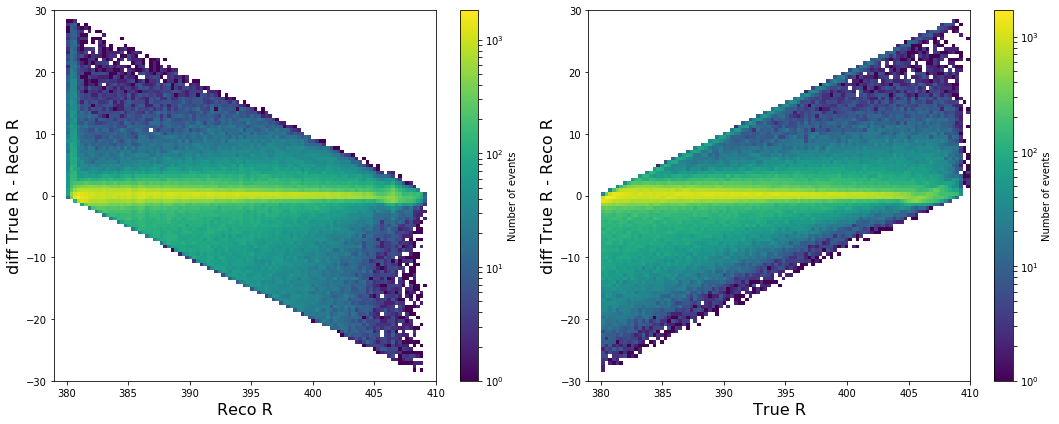

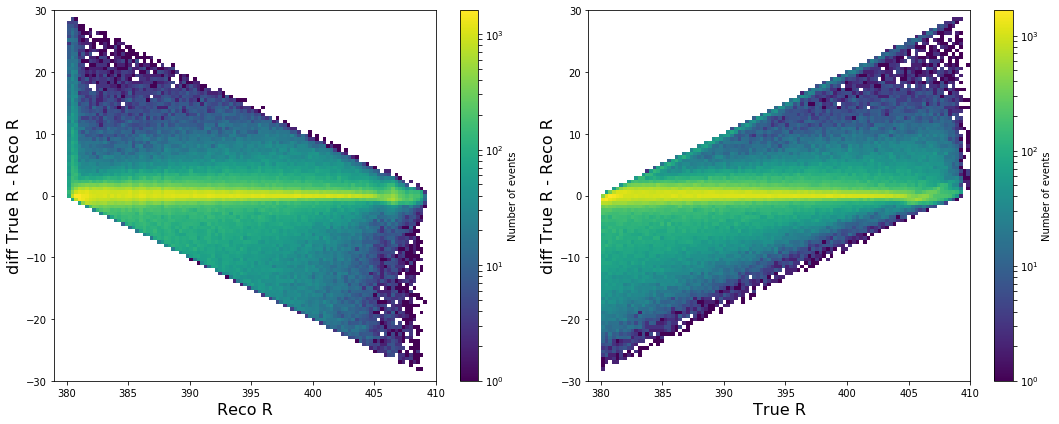

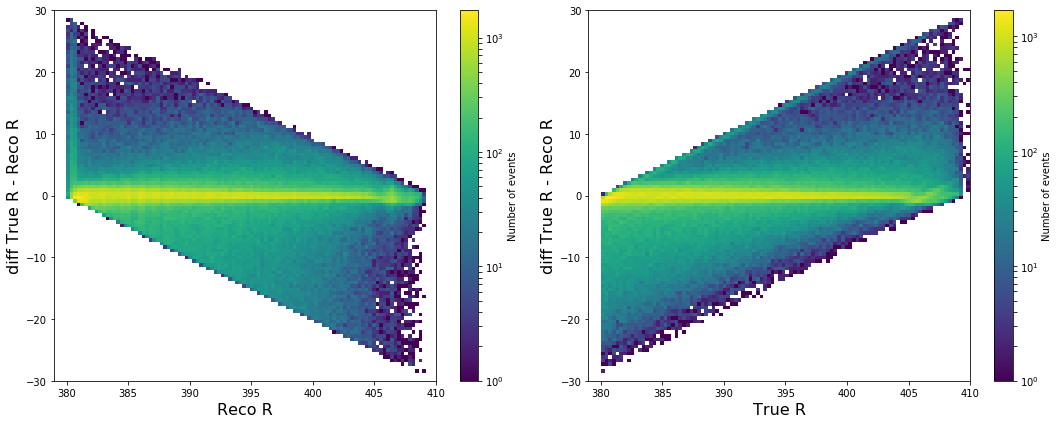

In [186]:
diff_r_0 = true_r_0 - reco_r_0
diff_r_1 = true_r_1 - reco_r_1
diff_r_2 = true_r_2 - reco_r_2

plot_2d_reco_true(reco_r_0, diff_r_0, true_r_0, diff_r_0, xbins, ybins, 
                 'Reco R', 'diff True R - Reco R', 'True R', 'diff True R - Reco R',
                 (379,410), (-30, 30), (379,410), (-30,30))
plot_2d_reco_true(reco_r_1, diff_r_1, true_r_1, diff_r_1, xbins, ybins, 
                 'Reco R', 'diff True R - Reco R', 'True R', 'diff True R - Reco R',
                 (379,410), (-30, 30), (379,410), (-30,30))
plot_2d_reco_true(reco_r_2, diff_r_2, true_r_2, diff_r_2, xbins, ybins, 
                 'Reco R', 'diff True R - Reco R', 'True R', 'diff True R - Reco R',
                 (379,410), (-30, 30), (379,410), (-30,30))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


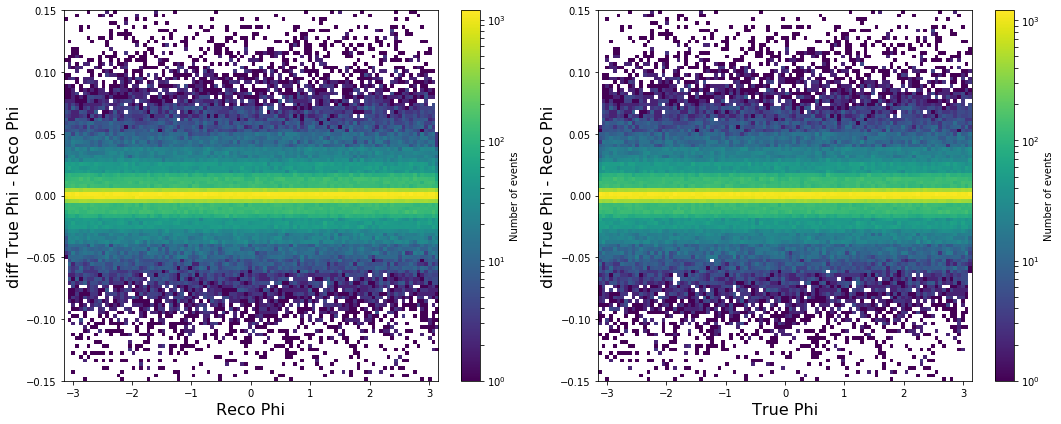

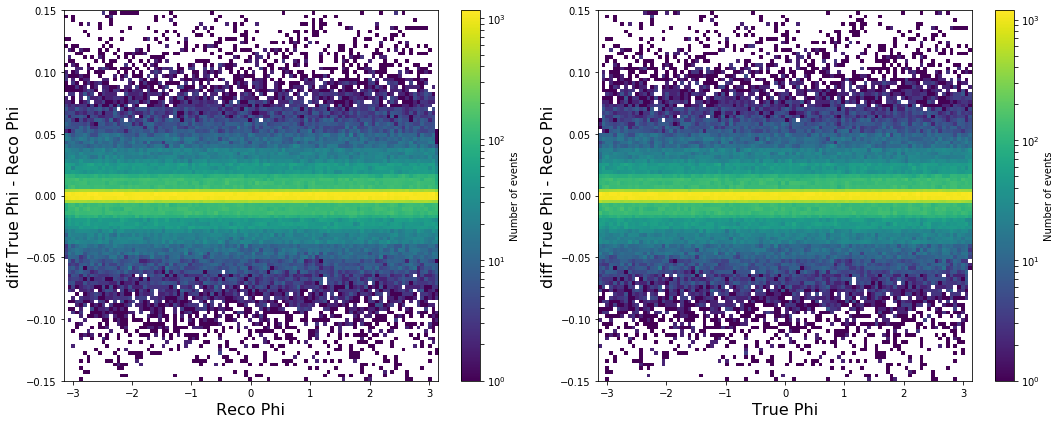

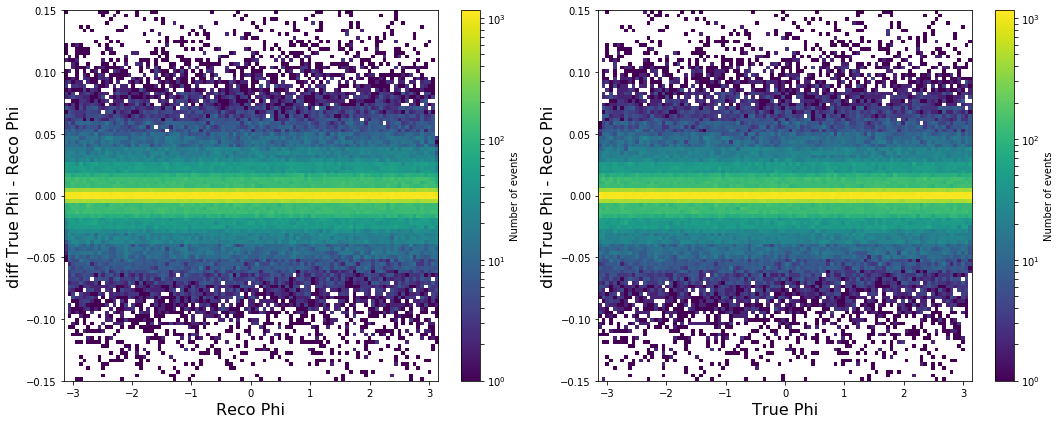

In [187]:
diff_phi_0 = true_phi_0 - reco_phi_0
diff_phi_1 = true_phi_1 - reco_phi_1
diff_phi_2 = true_phi_2 - reco_phi_2

plot_2d_reco_true(reco_phi_0, diff_phi_0, true_phi_0, diff_phi_0, xbins, ybins,
                 'Reco Phi', 'diff True Phi - Reco Phi', 'True Phi', 'diff True Phi - Reco Phi',
                 (-3.15,3.15), (-0.15,0.15), (-3.15,3.15), (-0.15,0.15))
plot_2d_reco_true(reco_phi_1, diff_phi_1, true_phi_1, diff_phi_1, xbins, ybins,
                 'Reco Phi', 'diff True Phi - Reco Phi', 'True Phi', 'diff True Phi - Reco Phi',
                 (-3.15,3.15), (-0.15,0.15), (-3.15,3.15), (-0.15,0.15))
plot_2d_reco_true(reco_phi_2, diff_phi_2, true_phi_2, diff_phi_2, xbins, ybins,
                 'Reco Phi', 'diff True Phi - Reco Phi', 'True Phi', 'diff True Phi - Reco Phi',
                 (-3.15,3.15), (-0.15,0.15), (-3.15,3.15), (-0.15,0.15))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


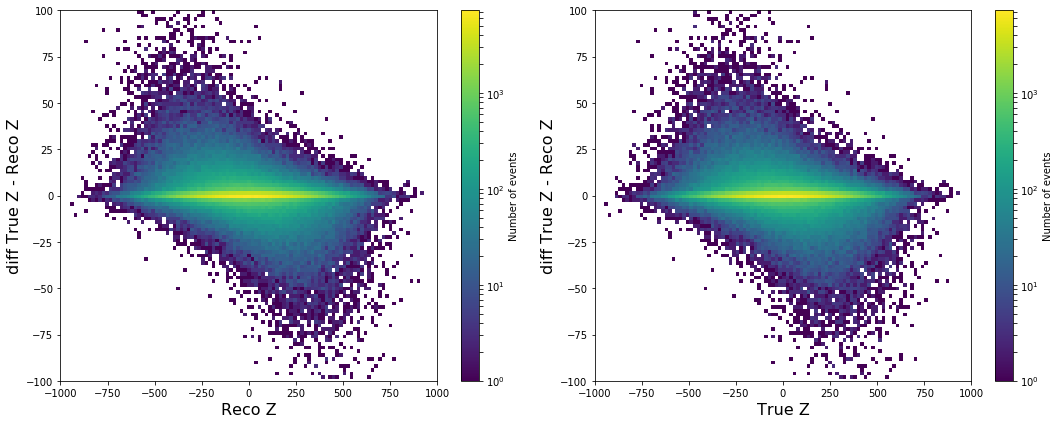

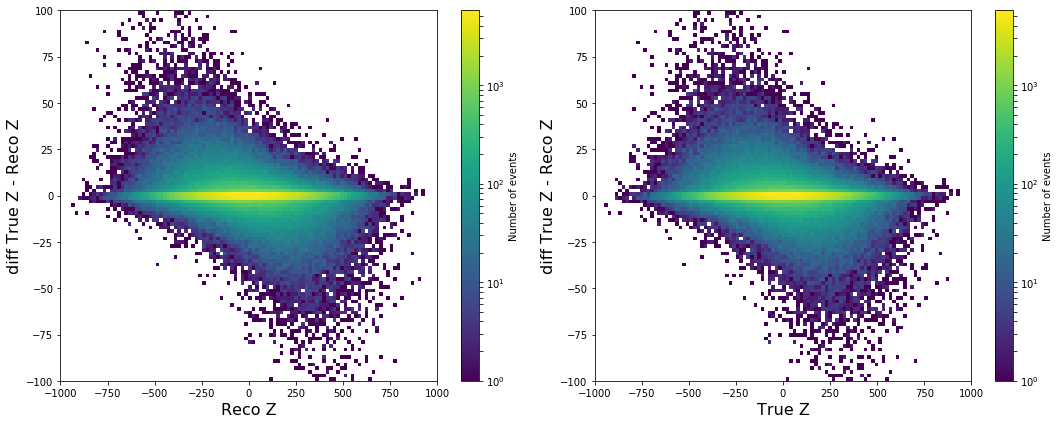

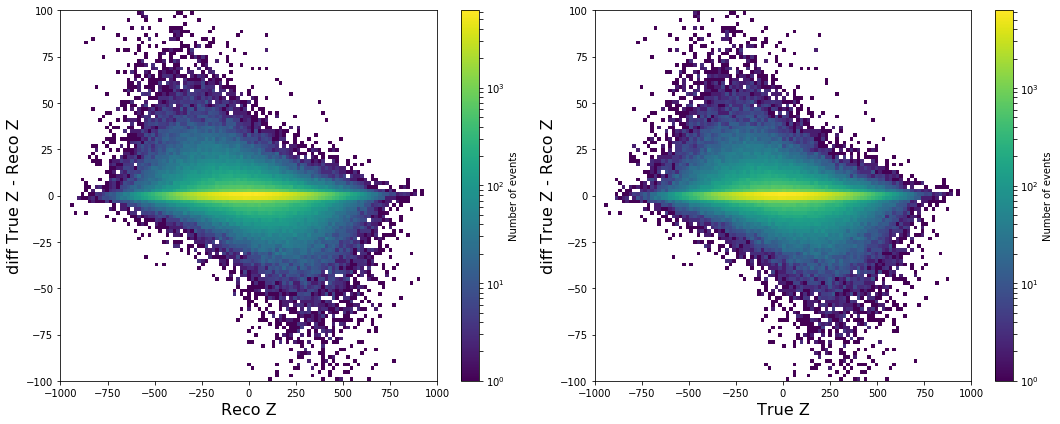

In [188]:
diff_z_0 = true_z_0 - reco_z_0
diff_z_1 = true_z_1 - reco_z_1
diff_z_2 = true_z_2 - reco_z_2

plot_2d_reco_true(reco_z_0, diff_z_0, true_z_0, diff_z_0, xbins, ybins,
                 'Reco Z', 'diff True Z - Reco Z', 'True Z', 'diff True Z - Reco Z',
                 (-1000,1000), (-100,100), (-1000,1000), (-100,100))
plot_2d_reco_true(reco_z_1, diff_z_1, true_z_1, diff_z_1, xbins, ybins,
                 'Reco Z', 'diff True Z - Reco Z', 'True Z', 'diff True Z - Reco Z',
                 (-1000,1000), (-100,100), (-1000,1000), (-100,100))
plot_2d_reco_true(reco_z_2, diff_z_2, true_z_2, diff_z_2, xbins, ybins,
                 'Reco Z', 'diff True Z - Reco Z', 'True Z', 'diff True Z - Reco Z',
                 (-1000,1000), (-100,100), (-1000,1000), (-100,100))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


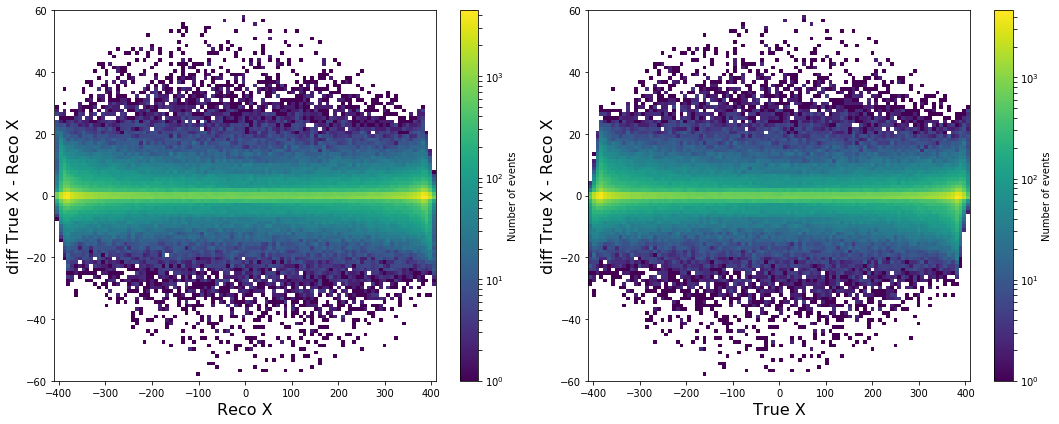

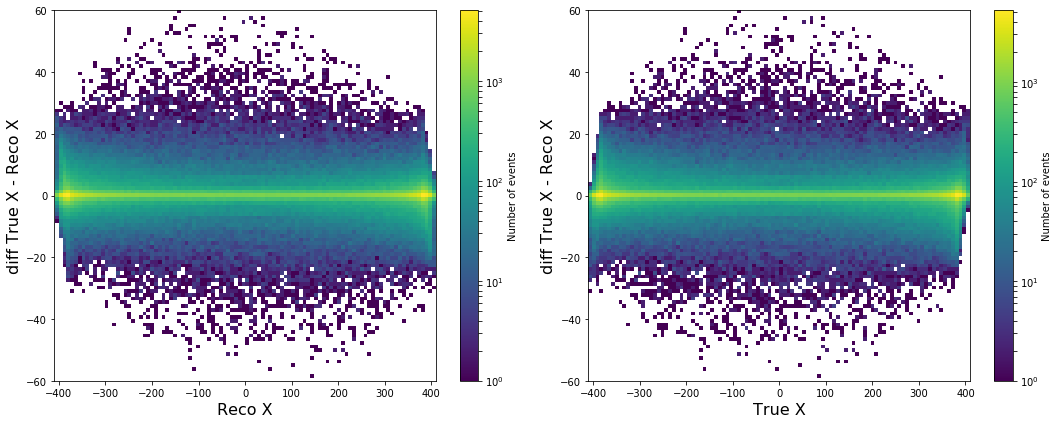

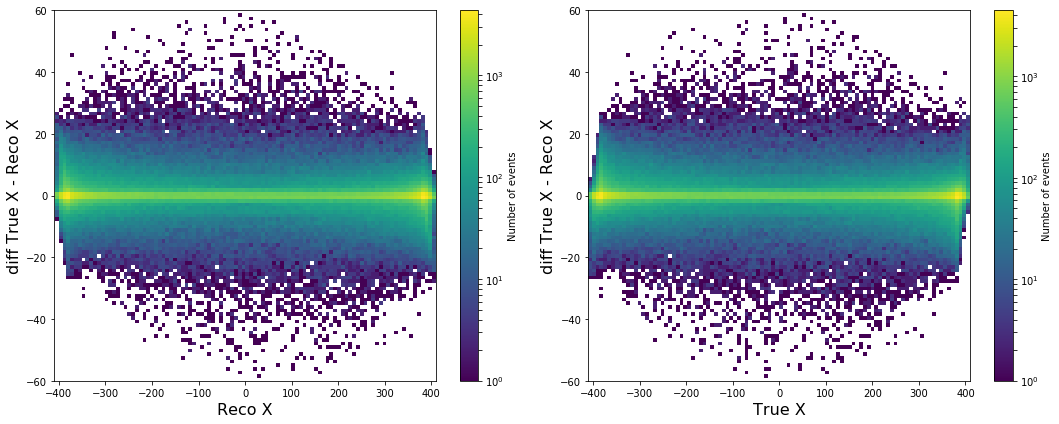

In [189]:
diff_x_0 = true_x_0 - reco_x_0
diff_x_1 = true_x_1 - reco_x_1
diff_x_2 = true_x_2 - reco_x_2

plot_2d_reco_true(reco_x_0, diff_x_0, true_x_0, diff_x_0, xbins, ybins,
                 'Reco X', 'diff True X - Reco X', 'True X', 'diff True X - Reco X',
                 (-410,410), (-60, 60), (-410,410), (-60, 60))
plot_2d_reco_true(reco_x_1, diff_x_1, true_x_1, diff_x_1, xbins, ybins,
                 'Reco X', 'diff True X - Reco X', 'True X', 'diff True X - Reco X',
                 (-410,410), (-60, 60), (-410,410), (-60, 60))
plot_2d_reco_true(reco_x_2, diff_x_2, true_x_2, diff_x_2, xbins, ybins,
                 'Reco X', 'diff True X - Reco X', 'True X', 'diff True X - Reco X',
                 (-410,410), (-60, 60), (-410,410), (-60, 60))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


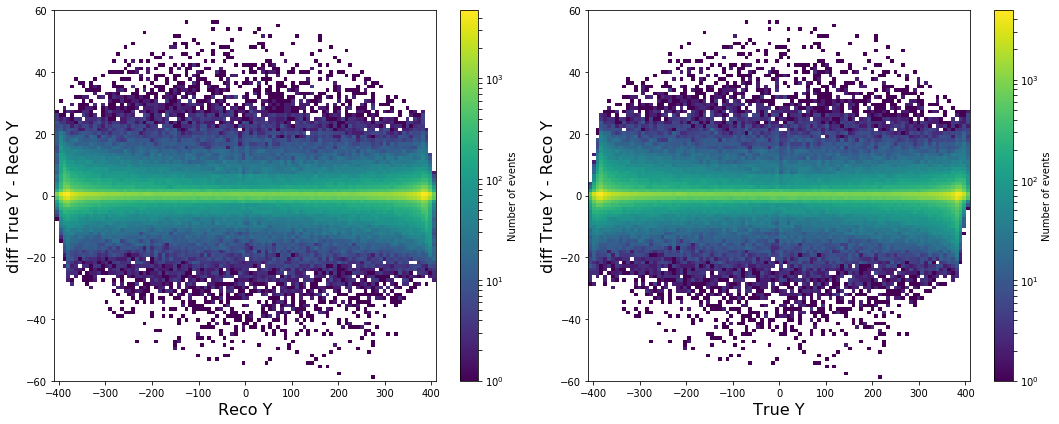

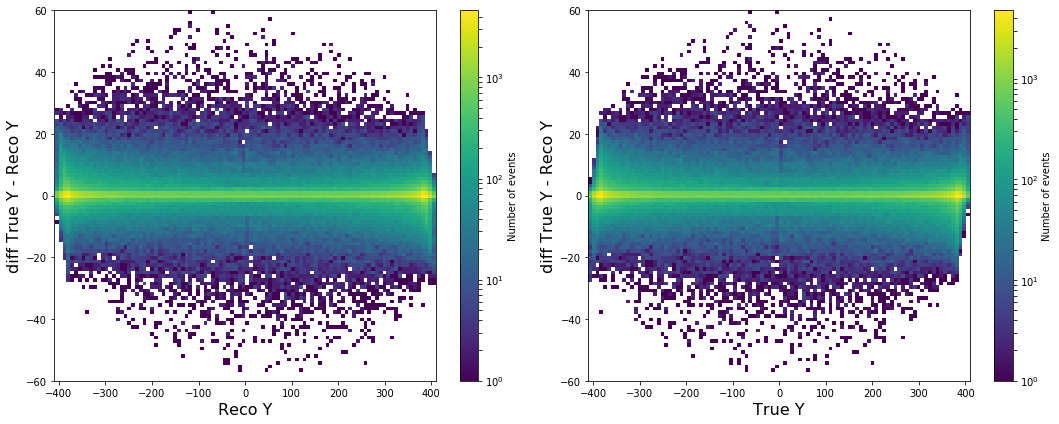

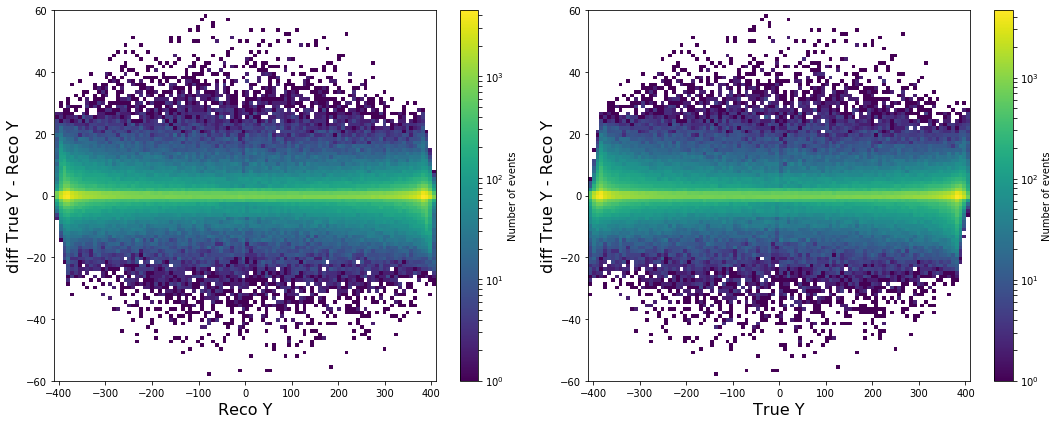

In [190]:
diff_y_0 = true_y_0 - reco_y_0
diff_y_1 = true_y_1 - reco_y_1
diff_y_2 = true_y_2 - reco_y_2

plot_2d_reco_true(reco_y_0, diff_y_0, true_y_0, diff_y_0, xbins, ybins,
                 'Reco Y', 'diff True Y - Reco Y', 'True Y', 'diff True Y - Reco Y',
                 (-410,410), (-60, 60), (-410,410), (-60, 60))
plot_2d_reco_true(reco_y_1, diff_y_1, true_y_1, diff_y_1, xbins, ybins,
                 'Reco Y', 'diff True Y - Reco Y', 'True Y', 'diff True Y - Reco Y',
                 (-410,410), (-60, 60), (-410,410), (-60, 60))
plot_2d_reco_true(reco_y_2, diff_y_2, true_y_2, diff_y_2, xbins, ybins,
                 'Reco Y', 'diff True Y - Reco Y', 'True Y', 'diff True Y - Reco Y',
                 (-410,410), (-60, 60), (-410,410), (-60, 60))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


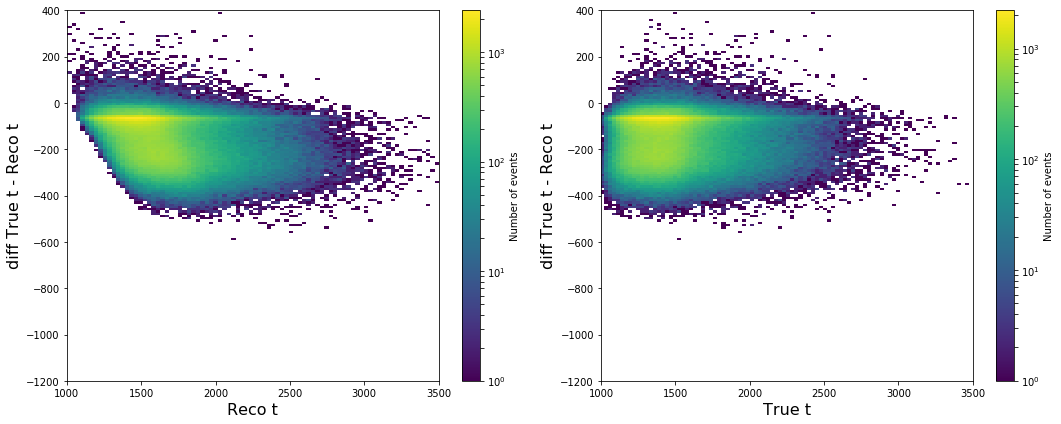

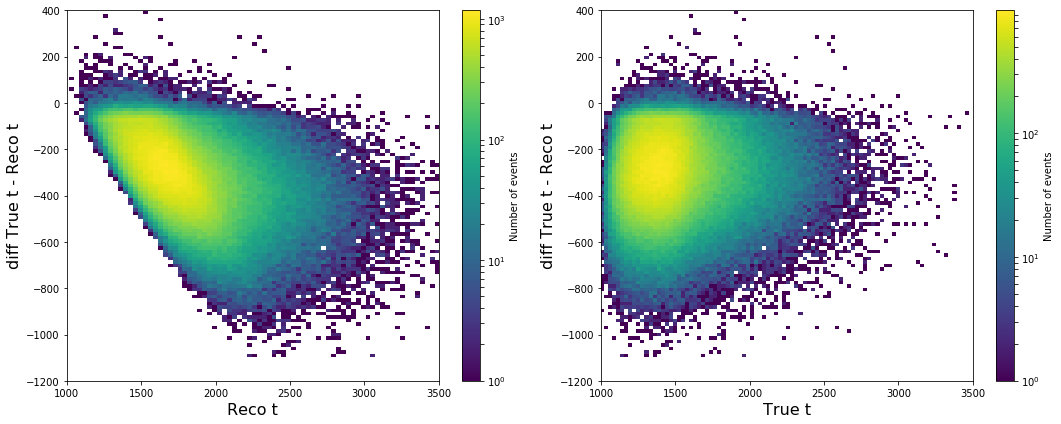

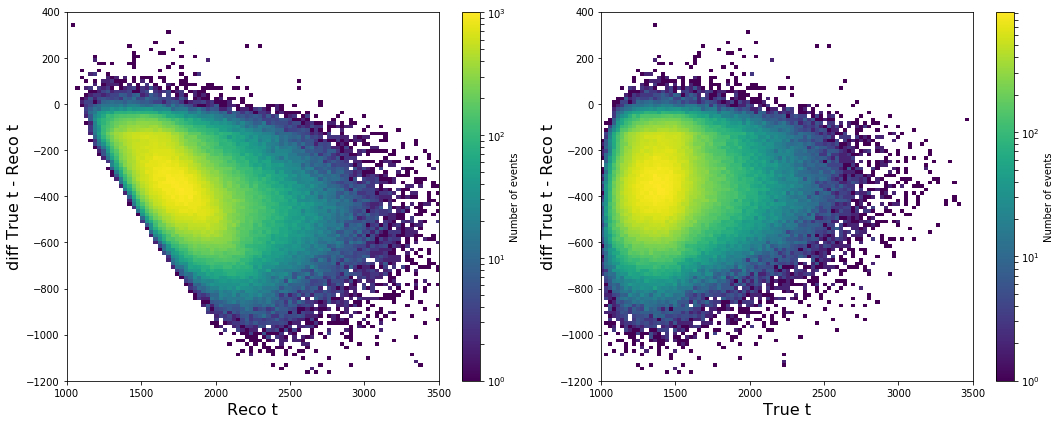

In [191]:
diff_t_0 = true_t_0 - reco_t_0
diff_t_1 = true_t_1 - reco_t_1
diff_t_2 = true_t_2 - reco_t_2

plot_2d_reco_true(reco_t_0, diff_t_0, true_t_0, diff_t_0, xbins, ybins,
                 'Reco t', 'diff True t - Reco t', 'True t', 'diff True t - Reco t',
                 (1000,3500), (-1200,400), (1000,3500), (-1200,400))
plot_2d_reco_true(reco_t_1, diff_t_1, true_t_1, diff_t_1, xbins, ybins,
                 'Reco t', 'diff True t - Reco t', 'True t', 'diff True t - Reco t',
                 (1000,3500), (-1200,400), (1000,3500), (-1200,400))
plot_2d_reco_true(reco_t_2, diff_t_2, true_t_2, diff_t_2, xbins, ybins,
                 'Reco t', 'diff True t - Reco t', 'True t', 'diff True t - Reco t',
                 (1000,3500), (-1200,400), (1000,3500), (-1200,400))

## Correlations

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


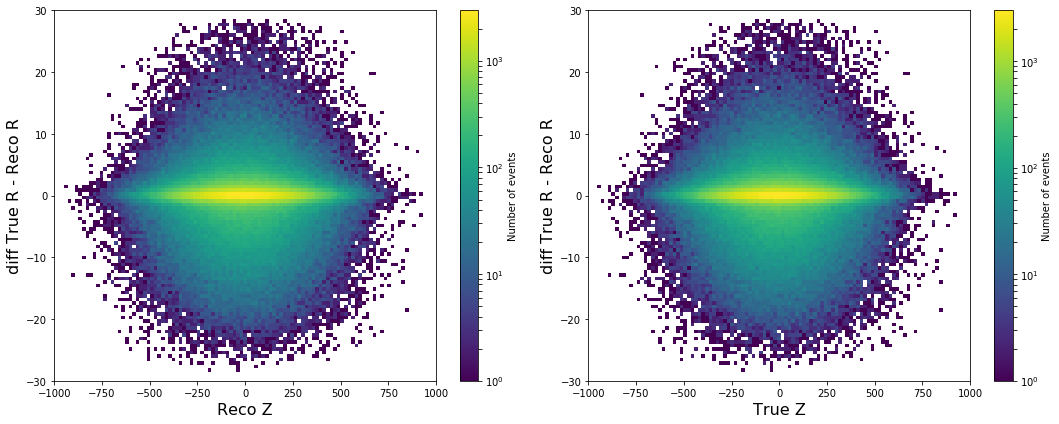

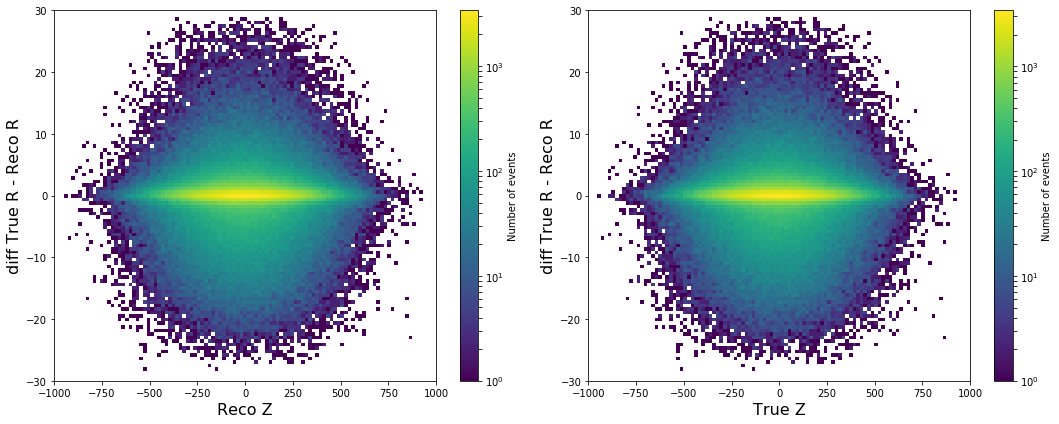

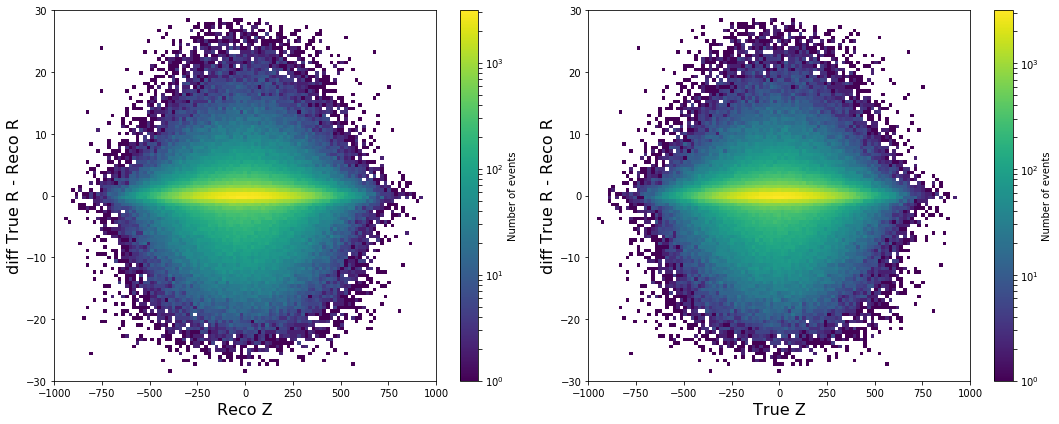

In [177]:
plot_2d_reco_true(reco_z_0, diff_r_0, true_z_0, diff_r_0, xbins, ybins, 
                 'Reco Z', 'diff True R - Reco R', 'True Z', 'diff True R - Reco R',
                 (-1000,1000), (-30, 30), (-1000,1000), (-30,30))
plot_2d_reco_true(reco_z_1, diff_r_1, true_z_1, diff_r_1, xbins, ybins, 
                 'Reco Z', 'diff True R - Reco R', 'True Z', 'diff True R - Reco R',
                 (-1000,1000), (-30, 30), (-1000,1000), (-30,30))
plot_2d_reco_true(reco_z_2, diff_r_2, true_z_2, diff_r_2, xbins, ybins, 
                 'Reco Z', 'diff True R - Reco R', 'True Z', 'diff True R - Reco R',
                 (-1000,1000), (-30, 30), (-1000,1000), (-30,30))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


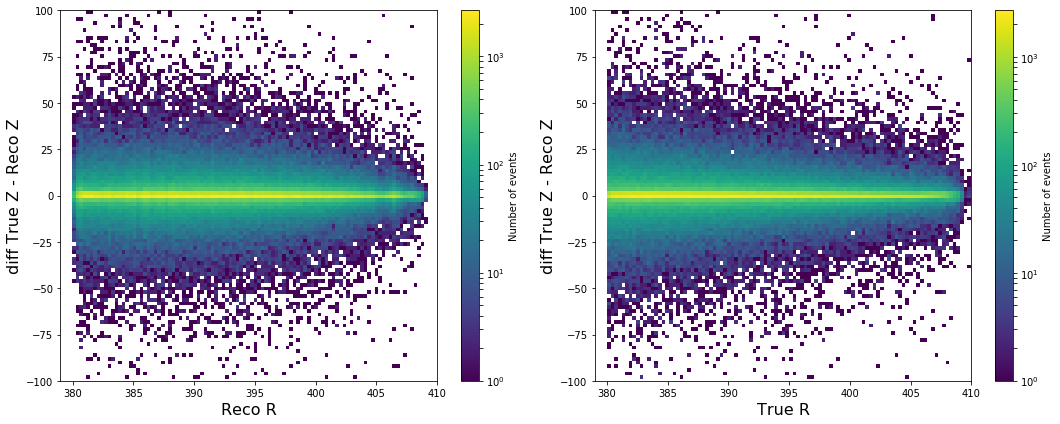

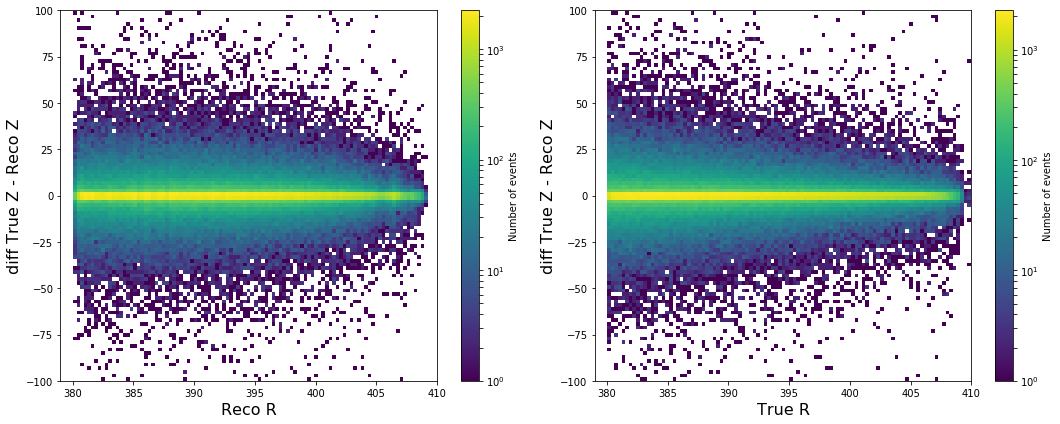

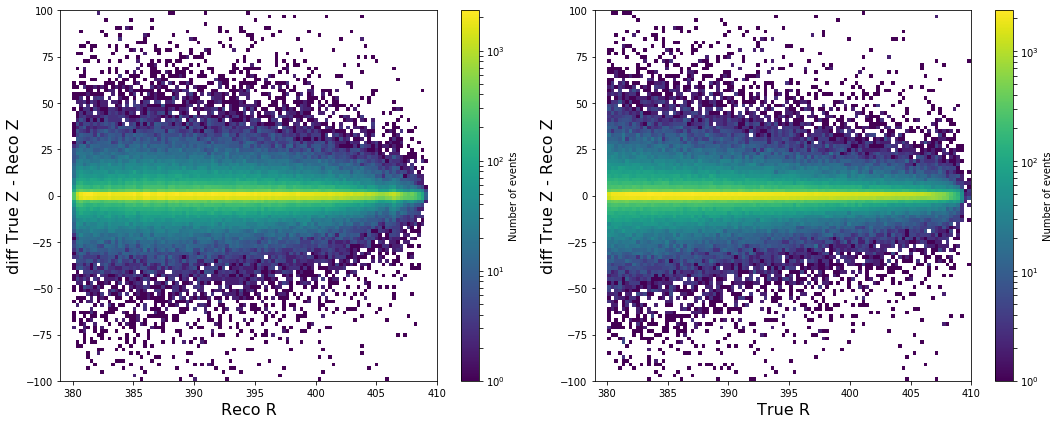

In [178]:
plot_2d_reco_true(reco_r_0, diff_z_0, true_r_0, diff_z_0, xbins, ybins, 
                 'Reco R', 'diff True Z - Reco Z', 'True R', 'diff True Z - Reco Z',
                 (379,410), (-100, 100), (379,410), (-100,100))
plot_2d_reco_true(reco_r_1, diff_z_1, true_r_1, diff_z_1, xbins, ybins, 
                 'Reco R', 'diff True Z - Reco Z', 'True R', 'diff True Z - Reco Z',
                 (379,410), (-100, 100), (379,410), (-100,100))
plot_2d_reco_true(reco_r_2, diff_z_2, true_r_2, diff_z_2, xbins, ybins, 
                 'Reco R', 'diff True Z - Reco Z', 'True R', 'diff True Z - Reco Z',
                 (379,410), (-100, 100), (379,410), (-100,100))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


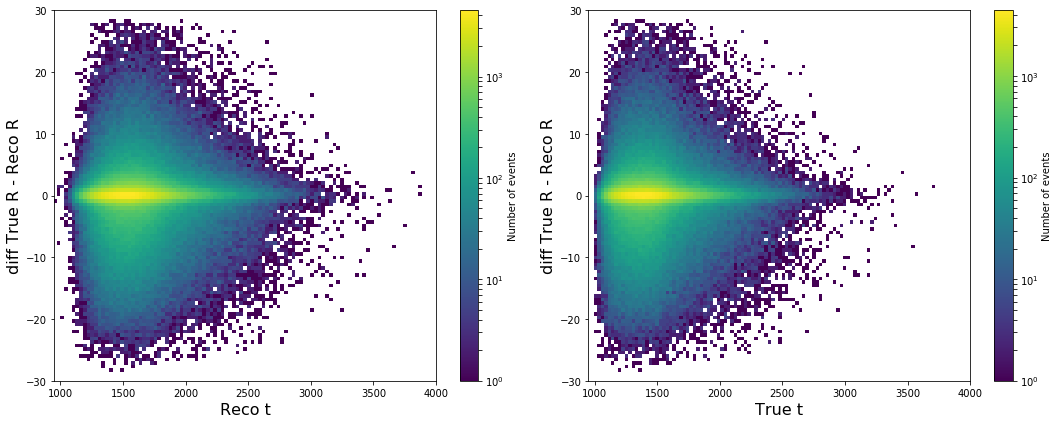

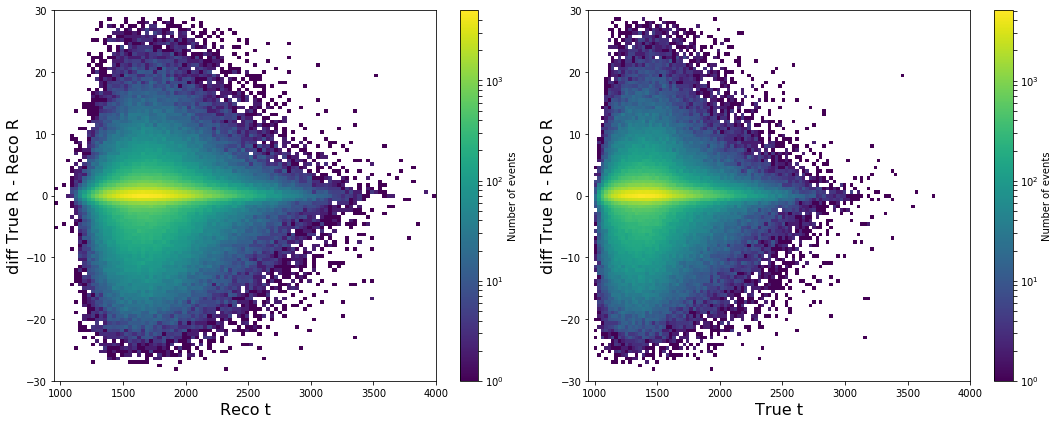

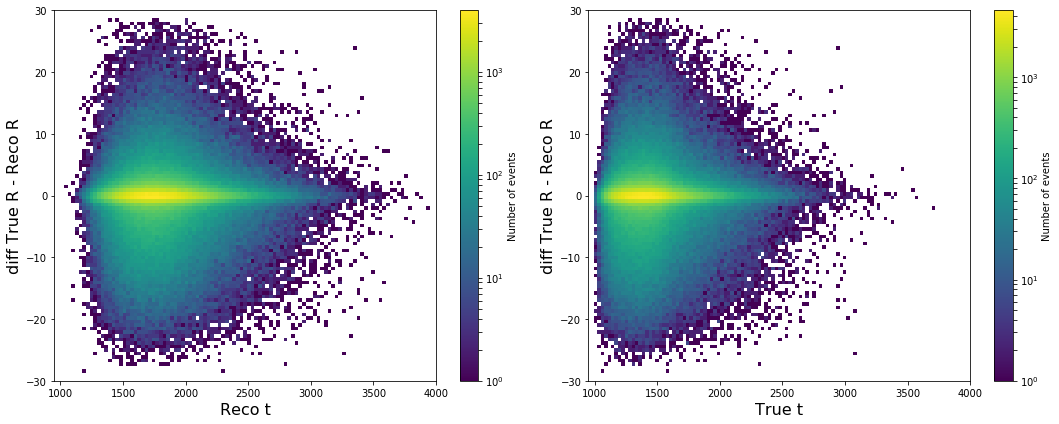

In [179]:
plot_2d_reco_true(reco_t_0, diff_r_0, true_t_0, diff_r_0, xbins, ybins, 
                 'Reco t', 'diff True R - Reco R', 'True t', 'diff True R - Reco R',
                 (950,4000), (-30, 30), (950,4000), (-30,30))
plot_2d_reco_true(reco_t_1, diff_r_1, true_t_1, diff_r_1, xbins, ybins, 
                 'Reco t', 'diff True R - Reco R', 'True t', 'diff True R - Reco R',
                 (950,4000), (-30, 30), (950,4000), (-30,30))
plot_2d_reco_true(reco_t_2, diff_r_2, true_t_2, diff_r_2, xbins, ybins, 
                 'Reco t', 'diff True R - Reco R', 'True t', 'diff True R - Reco R',
                 (950,4000), (-30, 30), (950,4000), (-30,30))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


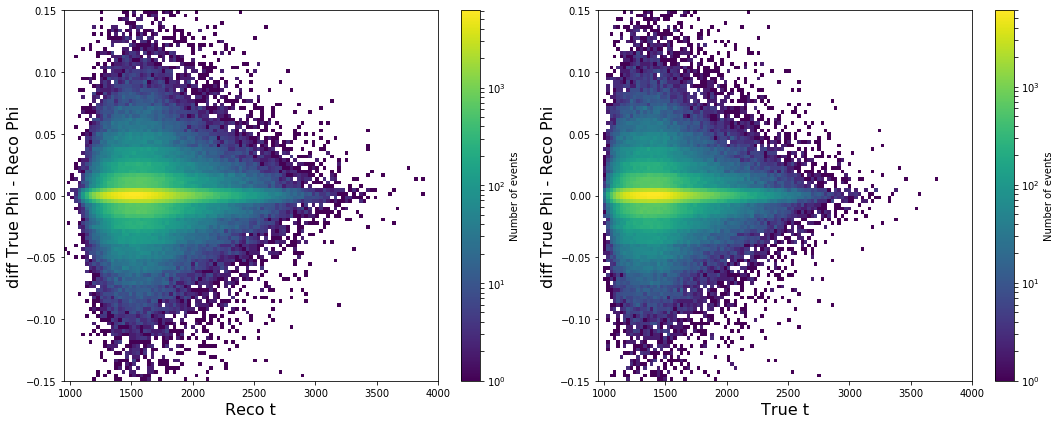

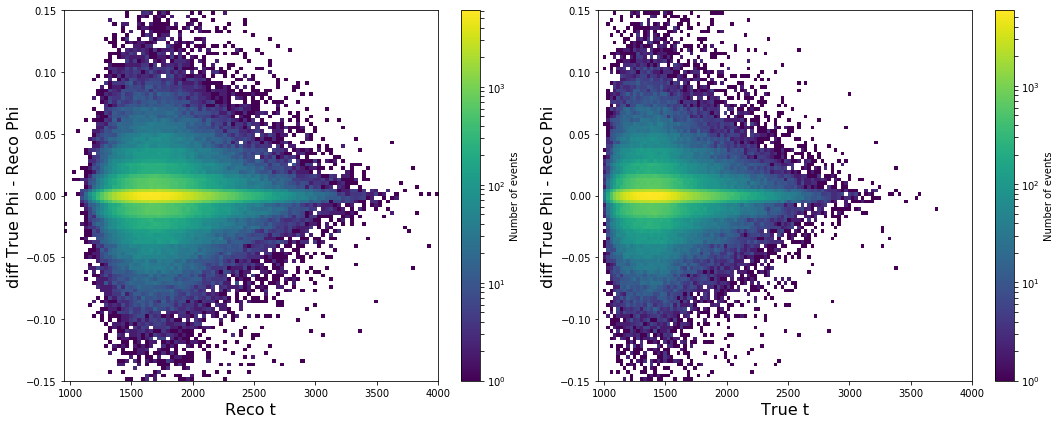

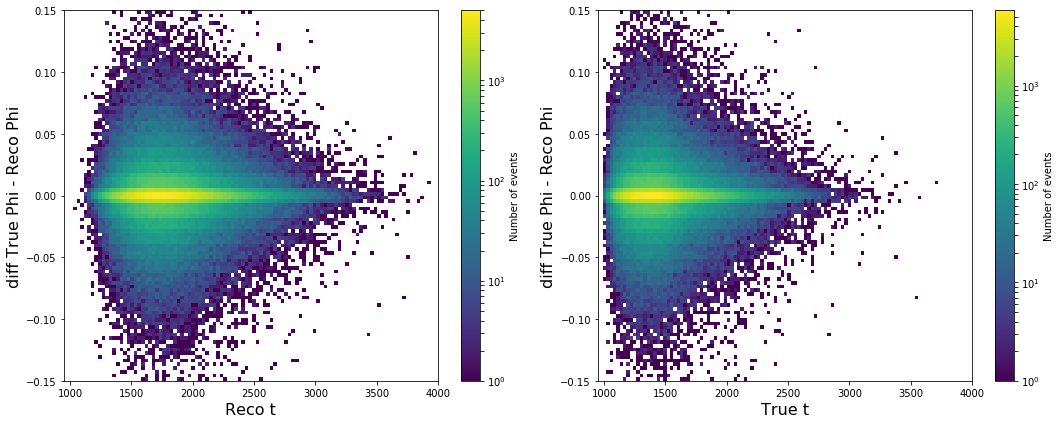

In [180]:
plot_2d_reco_true(reco_t_0, diff_phi_0, true_t_0, diff_phi_0, xbins, ybins, 
                 'Reco t', 'diff True Phi - Reco Phi', 'True t', 'diff True Phi - Reco Phi',
                 (950,4000), (-0.15,0.15), (950,4000), (-0.15,0.15))
plot_2d_reco_true(reco_t_1, diff_phi_1, true_t_1, diff_phi_1, xbins, ybins, 
                 'Reco t', 'diff True Phi - Reco Phi', 'True t', 'diff True Phi - Reco Phi',
                 (950,4000), (-0.15,0.15), (950,4000), (-0.15,0.15))
plot_2d_reco_true(reco_t_2, diff_phi_2, true_t_2, diff_phi_2, xbins, ybins, 
                 'Reco t', 'diff True Phi - Reco Phi', 'True t', 'diff True Phi - Reco Phi',
                 (950,4000), (-0.15,0.15), (950,4000), (-0.15,0.15))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


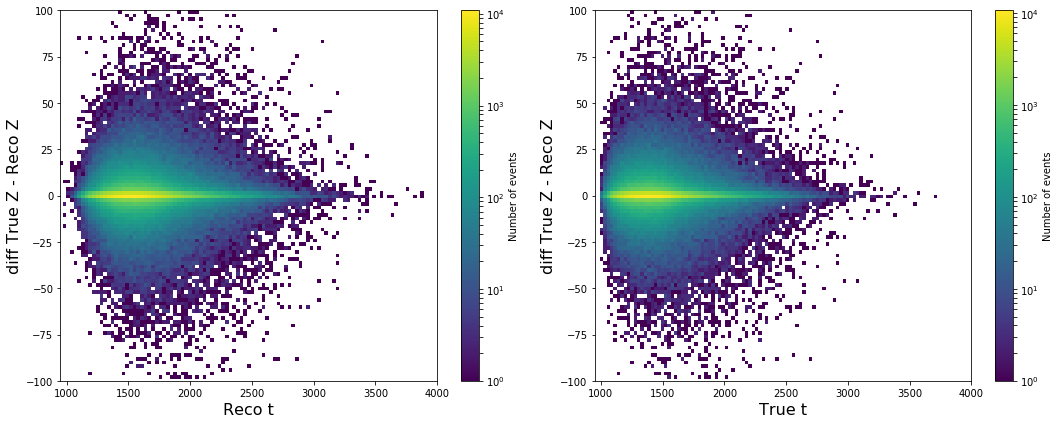

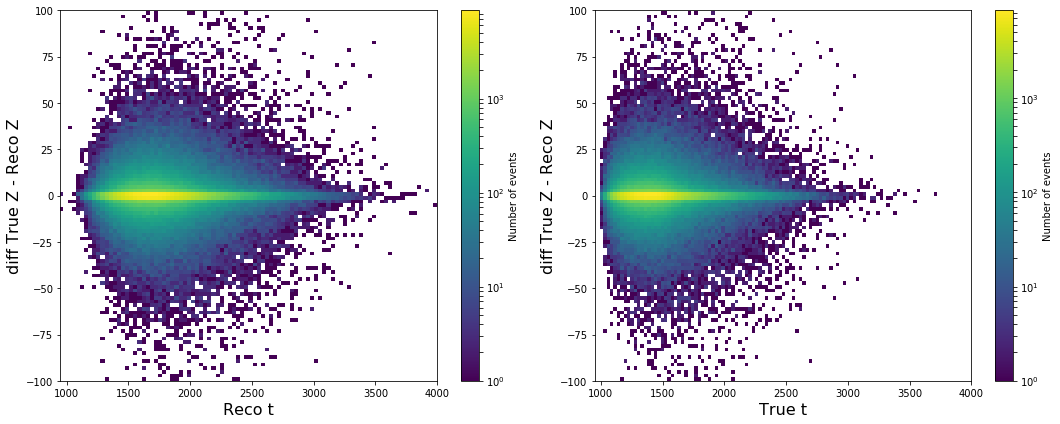

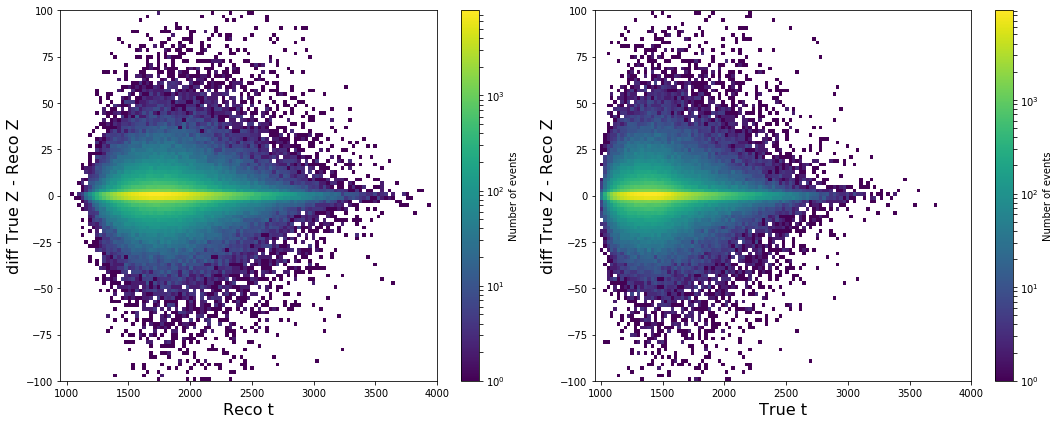

In [181]:
plot_2d_reco_true(reco_t_0, diff_z_0, true_t_0, diff_z_0, xbins, ybins, 
                 'Reco t', 'diff True Z - Reco Z', 'True t', 'diff True Z - Reco Z',
                 (950,4000), (-100,100), (950,4000), (-100,100))
plot_2d_reco_true(reco_t_1, diff_z_1, true_t_1, diff_z_1, xbins, ybins, 
                 'Reco t', 'diff True Z - Reco Z', 'True t', 'diff True Z - Reco Z',
                 (950,4000), (-100,100), (950,4000), (-100,100))
plot_2d_reco_true(reco_t_2, diff_z_2, true_t_2, diff_z_2, xbins, ybins, 
                 'Reco t', 'diff True Z - Reco Z', 'True t', 'diff True Z - Reco Z',
                 (950,4000), (-100,100), (950,4000), (-100,100))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


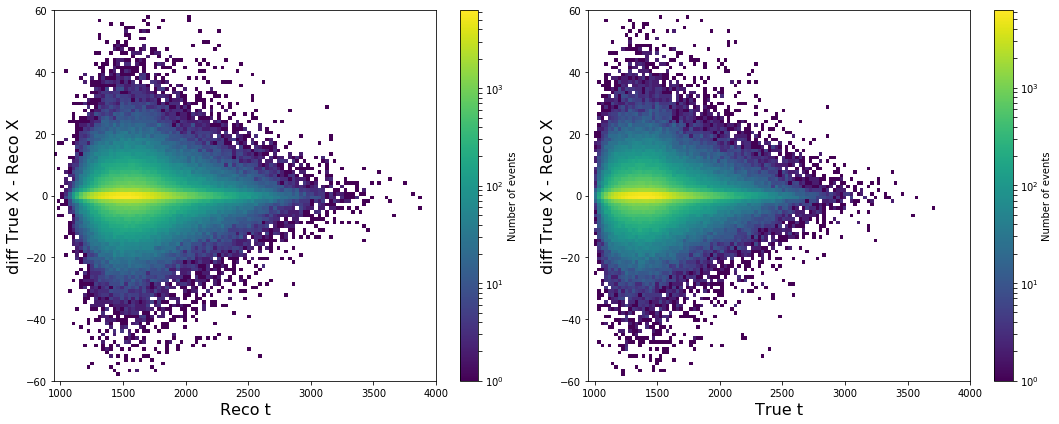

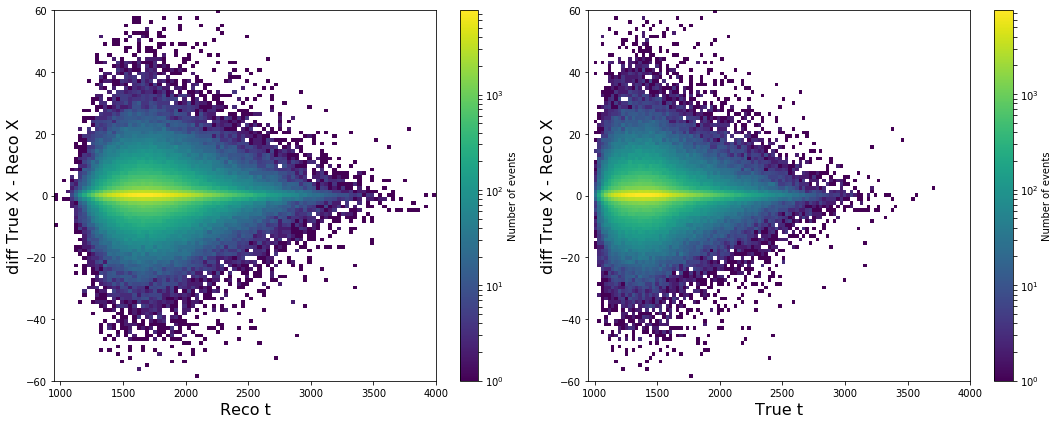

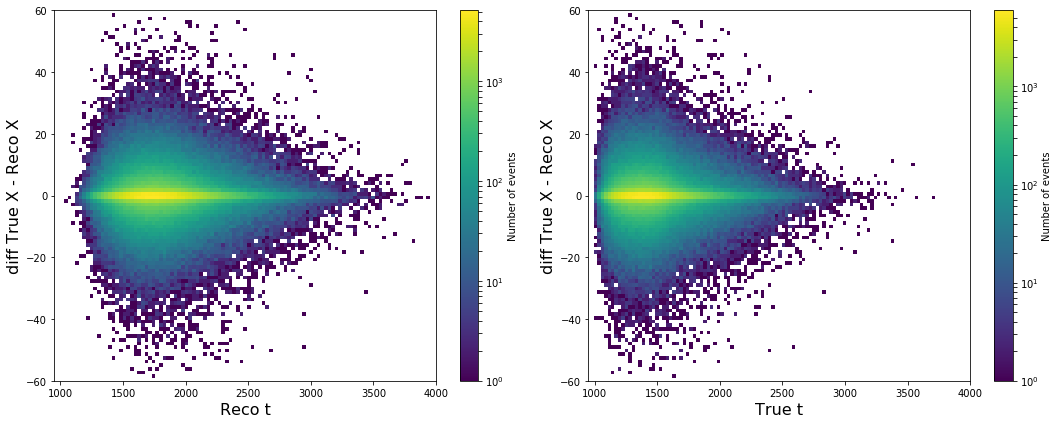

In [182]:
plot_2d_reco_true(reco_t_0, diff_x_0, true_t_0, diff_x_0, xbins, ybins, 
                 'Reco t', 'diff True X - Reco X', 'True t', 'diff True X - Reco X',
                 (950,4000), (-60,60), (950,4000), (-60,60))
plot_2d_reco_true(reco_t_1, diff_x_1, true_t_1, diff_x_1, xbins, ybins, 
                 'Reco t', 'diff True X - Reco X', 'True t', 'diff True X - Reco X',
                 (950,4000), (-60,60), (950,4000), (-60,60))
plot_2d_reco_true(reco_t_2, diff_x_2, true_t_2, diff_x_2, xbins, ybins, 
                 'Reco t', 'diff True X - Reco X', 'True t', 'diff True X - Reco X',
                 (950,4000), (-60,60), (950,4000), (-60,60))

/home/rolucar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


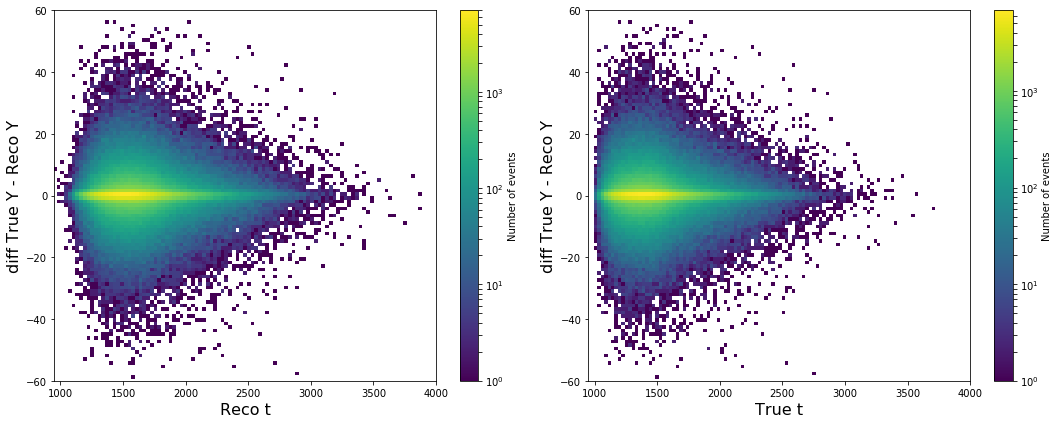

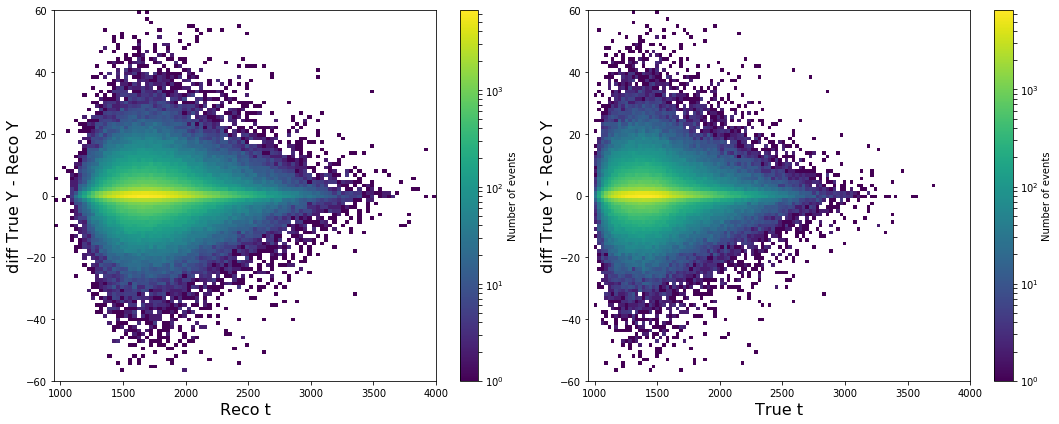

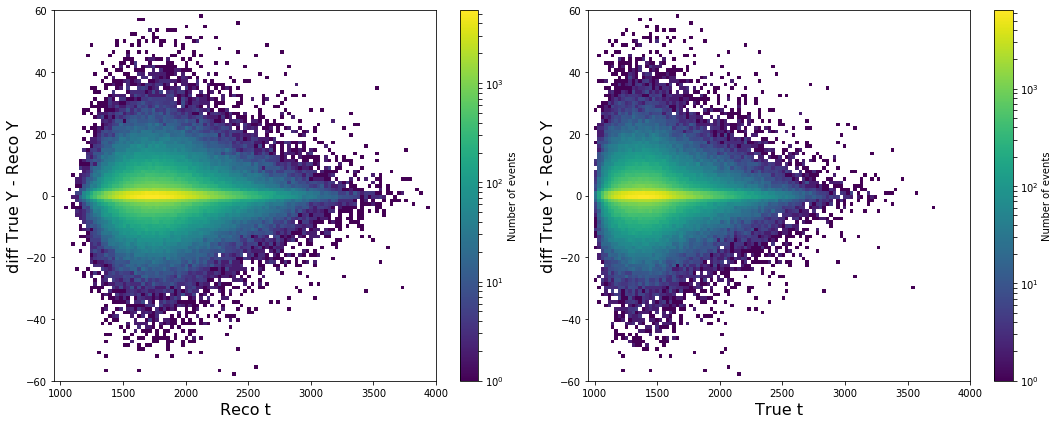

In [183]:
plot_2d_reco_true(reco_t_0, diff_y_0, true_t_0, diff_y_0, xbins, ybins, 
                 'Reco t', 'diff True Y - Reco Y', 'True t', 'diff True Y - Reco Y',
                 (950,4000), (-60,60), (950,4000), (-60,60))
plot_2d_reco_true(reco_t_1, diff_y_1, true_t_1, diff_y_1, xbins, ybins, 
                 'Reco t', 'diff True Y - Reco Y', 'True t', 'diff True Y - Reco Y',
                 (950,4000), (-60,60), (950,4000), (-60,60))
plot_2d_reco_true(reco_t_2, diff_y_2, true_t_2, diff_y_2, xbins, ybins, 
                 'Reco t', 'diff True Y - Reco Y', 'True t', 'diff True Y - Reco Y',
                 (950,4000), (-60,60), (950,4000), (-60,60))

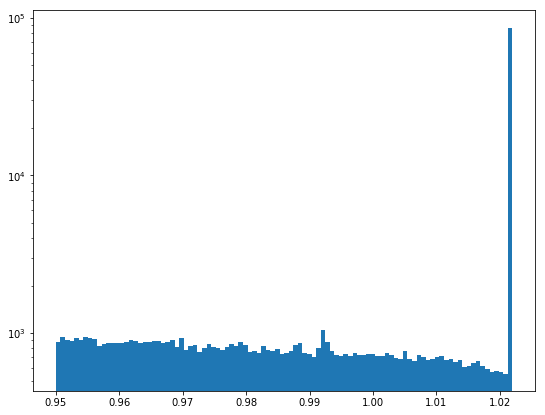

In [139]:
sel_phot_like = ev_above_e_thr_0.phot_like2 == 0
good_e = ev_above_e_thr_0.true_energy.values[sel_phot_like]
h = plt.hist(good_e, bins=100);
plt.yscale('log')

In [192]:
ev_above_e_thr_0.head()

,event_id,index,phot_like1,phot_like2,reco_phi1,reco_phi2,reco_r1,reco_r2,reco_t1,reco_t2,...,true_z1,true_z2,reco_x1,reco_y1,reco_x2,reco_y2,true_x1,true_y1,true_x2,true_y2
0,30000010.0,0.0,0.0,0.0,-2.268170,0.813638,392.601502,396.199921,1566.694590,1408.483296,...,204.739853,-78.465645,-252.131219,-300.941502,272.133533,287.954367,-260.732354,-286.246904,269.301854,283.419491
1,30000011.0,0.0,1.0,0.0,2.486806,-0.563731,385.917741,385.092019,1254.164274,1745.640968,...,103.040283,-216.999146,-306.101484,235.019966,325.505675,-205.771520,-307.171495,234.350756,323.503775,-211.525825
2,30000021.0,0.0,1.0,0.0,-2.396611,0.589033,382.486862,390.327715,2010.093055,1547.350676,...,-280.982269,211.893494,-281.166223,-259.310150,324.549030,216.849376,-281.603342,-258.215019,327.307677,215.907222
3,30000023.0,0.0,0.0,0.0,-1.204375,1.986000,391.331118,393.139613,1343.404247,1607.654810,...,64.822388,-136.211136,140.204664,-365.352838,-158.583150,359.736209,136.356645,-366.748246,-153.870042,351.397209
4,30000036.0,0.0,0.0,0.0,0.370394,-2.564779,403.904472,384.626417,1692.399391,1351.003655,...,-198.688644,160.214569,376.513547,146.206603,-322.395728,-209.758135,375.297545,125.769083,-317.454128,-215.482315


In [193]:
ev_above_e_thr_1.head()

,event_id,index,phot_like1,phot_like2,reco_phi1,reco_phi2,reco_r1,reco_r2,reco_t1,reco_t2,...,true_z1,true_z2,reco_x1,reco_y1,reco_x2,reco_y2,true_x1,true_y1,true_x2,true_y2
0,30000010.0,0.0,0.0,0.0,-2.315378,0.811060,386.677753,389.605580,1867.589532,1729.201606,...,204.739853,-78.465645,-262.037635,-284.351829,268.333111,282.470971,-260.732354,-286.246904,269.301854,283.419491
1,30000011.0,0.0,1.0,0.0,2.486963,-0.576864,386.954316,382.386615,1791.440151,1811.666629,...,103.040283,-216.999146,-306.960622,235.603097,320.507687,-208.552982,-307.171495,234.350756,323.503775,-211.525825
2,30000021.0,0.0,1.0,0.0,-2.399202,0.592431,381.311925,391.232814,1798.456084,1380.678110,...,-280.982269,211.893494,-280.971470,-257.786380,324.561074,218.456458,-281.603342,-258.215019,327.307677,215.907222
3,30000023.0,0.0,0.0,0.0,-1.219357,1.986071,391.247768,391.467555,1378.696697,1727.985355,...,64.822388,-136.211136,134.686728,-367.334046,-157.934051,358.195034,136.356645,-366.748246,-153.870042,351.397209
4,30000036.0,0.0,0.0,0.0,0.327342,-2.571704,385.058750,394.830458,1806.584675,1534.806124,...,-198.688644,160.214569,364.612240,123.806927,-332.431849,-213.026186,375.297545,125.769083,-317.454128,-215.482315


In [194]:
ev_above_e_thr_2.head()

,event_id,index,phot_like1,phot_like2,reco_phi1,reco_phi2,reco_r1,reco_r2,reco_t1,reco_t2,...,true_z1,true_z2,reco_x1,reco_y1,reco_x2,reco_y2,true_x1,true_y1,true_x2,true_y2
0,30000010.0,0.0,0.0,0.0,-2.295023,0.800433,380.420167,395.258853,1655.773356,1803.692565,...,204.739853,-78.465645,-252.049905,-284.939201,275.256564,283.660686,-260.732354,-286.246904,269.301854,283.419491
1,30000011.0,0.0,1.0,0.0,2.491258,-0.568285,386.882440,386.636510,1224.821327,2014.841158,...,103.040283,-216.999146,-307.912556,234.238938,325.867033,-208.082838,-307.171495,234.350756,323.503775,-211.525825
2,30000021.0,0.0,1.0,0.0,-2.396613,0.589120,381.465879,390.829887,1896.794633,1822.317896,...,-280.982269,211.893494,-280.416192,-258.617432,324.947684,217.156632,-281.603342,-258.215019,327.307677,215.907222
3,30000023.0,0.0,0.0,0.0,-1.194359,1.983062,382.129700,381.080694,1656.636404,2010.414194,...,64.822388,-136.211136,140.474655,-355.373013,-152.693648,349.152038,136.356645,-366.748246,-153.870042,351.397209
4,30000036.0,0.0,0.0,0.0,0.317466,-2.534560,394.353693,394.760736,2076.266669,1946.164589,...,-198.688644,160.214569,374.647621,123.101563,-324.234474,-225.184468,375.297545,125.769083,-317.454128,-215.482315
